# Give each tweet a label

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [120]:
#these are the topics
topic_matrix = pd.read_pickle('nmf_20topic_matrix.pkl')
topic_matrix.head(3)

,pay_for_hw,math_feelings,dont_get_it,good_or_bad_at math,HATE_MATH,just,non_eng,math_is_hard,math_class,election_burns,like,anime_chars,did_the_math,colors_to_subject,HELP_PLS,did_the_math_right,BAD_at_math,love_math,understant_basic_math,math_teacher,raw_tweets,translated,clean_tweets
0,0.000000,0.0,0.000244,0.000000,0.000000,0.000101,0.0,0.000000,0.0,0.001058,0.000000,0.000000,0.0,0.000384,0.000491,0.000884,0.000000,0.000000,0.0,0.000000,@math__like 都民,Citizens of Tokyo,citizens of tokyo
1,0.000000,0.0,0.000015,0.002589,0.001671,0.000000,0.0,0.000000,0.0,0.000000,0.000347,0.000171,0.0,0.000133,0.000000,0.000816,0.000000,0.000000,0.0,0.004735,@HamillHimself The Force of math is not with you.,the force of math is not with you.,the force of math is not with you.
2,0.000242,0.0,0.002704,0.000551,0.000000,0.001041,0.0,0.003024,0.0,0.004189,0.004264,0.000223,0.0,0.000000,0.000386,0.000216,0.001385,0.000228,0.0,0.001213,@JorgeHe18983518 @Roblox what math? what game ...,what math what game account,what math what game account


In [270]:
topic_matrix.rename(columns = {'understant_basic_math':'understand_basic_math'}, inplace = True)

have just the columns in a list

In [271]:
#just grab some of the most interpretable labels
strong_topics = ['pay_for_hw', 'math_feelings', 'dont_get_it', 
          'good_or_bad_at math', 'HATE_MATH', 'just', 'non_eng', 
          'math_is_hard', 'math_class', 'election_burns', 'like', 
          'anime_chars', 'did_the_math', 'colors_to_subject', 
          'HELP_PLS', 'did_the_math_right', 'BAD_at_math', 'love_math', 
          'understand_basic_math', 'math_teacher']

In [272]:
len(strong_topics)

20

make a df of just the topics. will turn it into an array and then grab the arg maxs to give each tweet a topic label

In [273]:
strong_tops_df = topic_matrix[strong_topics]
strong_tops_df.head(3)

,pay_for_hw,math_feelings,dont_get_it,good_or_bad_at math,HATE_MATH,just,non_eng,math_is_hard,math_class,election_burns,like,anime_chars,did_the_math,colors_to_subject,HELP_PLS,did_the_math_right,BAD_at_math,love_math,understand_basic_math,math_teacher
0,0.000000,0.0,0.000244,0.000000,0.000000,0.000101,0.0,0.000000,0.0,0.001058,0.000000,0.000000,0.0,0.000384,0.000491,0.000884,0.000000,0.000000,0.0,0.000000
1,0.000000,0.0,0.000015,0.002589,0.001671,0.000000,0.0,0.000000,0.0,0.000000,0.000347,0.000171,0.0,0.000133,0.000000,0.000816,0.000000,0.000000,0.0,0.004735
2,0.000242,0.0,0.002704,0.000551,0.000000,0.001041,0.0,0.003024,0.0,0.004189,0.004264,0.000223,0.0,0.000000,0.000386,0.000216,0.001385,0.000228,0.0,0.001213


In [274]:
#grab the og dataframe to tag on the top label to each post with the metadata
tweets = pd.read_pickle('clean_tweets_no_duplicates.pkl')
tweets.head()

,datetime,username,location,tweet_id,num_favorites,num_retweets,text,no_usernames,no_emojis,translated,clean_text,clean_text2,clean_text3
0,2020-11-02 00:36:03,kurage_Ref,深海,1323061272624033792,0,0,@math__like 都民,都民,都民,Citizens of Tokyo,citizens of tokyo,citizens of tokyo,citizens of tokyo
1,2020-11-02 00:36:02,Live2teachLives,"Levelland, Texas, USA",1323061269927251968,0,0,@HamillHimself The Force of math is not with you.,the force of math is not with you.,the force of math is not with you.,the force of math is not with you.,the force of math is not with you.,the force of math is not with you.,the force of math is not with you.
2,2020-11-02 00:36:02,NotSuperIsTaken,Trying to get free bobux,1323061269000310784,0,0,@JorgeHe18983518 @Roblox what math? what game ...,what math? what game account?,what math what game account,what math what game account,what math what game account,what math what game account,what math what game account
3,2020-11-02 00:36:02,chayaelizabeth,bucky barnes’s AND zuko’s ass,1323061268861825025,0,0,never forget me in high school being a vegetar...,never forget me in high school being a vegetar...,never forget me in high school being a vegetar...,never forget me in high school being a vegetar...,never forget me in high school being a vegetar...,never forget me in high school being a vegetar...,never forget me in high school being a vegetar...
4,2020-11-02 00:36:02,Nashrambl_,she/they | ace |,1323061267687333888,0,0,Just got 55 on my math test love it here 😍😍😍 /neg,just got 55 on my math test love it here 😍😍😍 /neg,just got 55 on my math test love it here /neg,just got 55 on my math test love it here /neg,just got on my math test love it here /neg,just got on my math test love it here /neg,just got on my math test love it here /neg


In [275]:
pd.set_option('display.max_columns', None)
full_df = pd.concat([topic_matrix, tweets[['datetime', 'username', 'location', 'tweet_id']]], axis = 1)
full_df.head()

,pay_for_hw,math_feelings,dont_get_it,good_or_bad_at math,HATE_MATH,just,non_eng,math_is_hard,math_class,election_burns,like,anime_chars,did_the_math,colors_to_subject,HELP_PLS,did_the_math_right,BAD_at_math,love_math,understand_basic_math,math_teacher,raw_tweets,translated,clean_tweets,datetime,username,location,tweet_id
0,0.000000,0.000000,0.000244,0.000000,0.000000,0.000101,0.0,0.000000,0.000000,0.001058,0.000000,0.000000,0.000000,0.000384,0.000491,0.000884,0.000000,0.000000,0.0,0.000000,@math__like 都民,Citizens of Tokyo,citizens of tokyo,2020-11-02 00:36:03,kurage_Ref,深海,1323061272624033792
1,0.000000,0.000000,0.000015,0.002589,0.001671,0.000000,0.0,0.000000,0.000000,0.000000,0.000347,0.000171,0.000000,0.000133,0.000000,0.000816,0.000000,0.000000,0.0,0.004735,@HamillHimself The Force of math is not with you.,the force of math is not with you.,the force of math is not with you.,2020-11-02 00:36:02,Live2teachLives,"Levelland, Texas, USA",1323061269927251968
2,0.000242,0.000000,0.002704,0.000551,0.000000,0.001041,0.0,0.003024,0.000000,0.004189,0.004264,0.000223,0.000000,0.000000,0.000386,0.000216,0.001385,0.000228,0.0,0.001213,@JorgeHe18983518 @Roblox what math? what game ...,what math what game account,what math what game account,2020-11-02 00:36:02,NotSuperIsTaken,Trying to get free bobux,1323061269000310784
3,0.000000,0.000421,0.004027,0.000000,0.000280,0.001327,0.0,0.000023,0.002437,0.000000,0.000000,0.000895,0.002292,0.002725,0.003509,0.000000,0.000491,0.000000,0.0,0.021429,never forget me in high school being a vegetar...,never forget me in high school being a vegetar...,never forget me in high school being a vegetar...,2020-11-02 00:36:02,chayaelizabeth,bucky barnes’s AND zuko’s ass,1323061268861825025
4,0.000000,0.000000,0.000000,0.000797,0.000000,0.106216,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.209163,0.0,0.022598,Just got 55 on my math test love it here 😍😍😍 /neg,just got 55 on my math test love it here /neg,just got on my math test love it here /neg,2020-11-02 00:36:02,Nashrambl_,she/they | ace |,1323061267687333888


get an array of all the topic values, then grab the argmaxs

In [276]:
topics_array = np.array(strong_tops_df)
topics_array[:5]

array([[0.00000000e+00, 0.00000000e+00, 2.43539369e-04, 0.00000000e+00,
        0.00000000e+00, 1.01174596e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.05803340e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.84280341e-04, 4.91301259e-04, 8.83513184e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.50042836e-05, 2.58944801e-03,
        1.67057666e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.47314341e-04, 1.71349265e-04,
        0.00000000e+00, 1.33087032e-04, 0.00000000e+00, 8.16049052e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.73515136e-03],
       [2.42420160e-04, 0.00000000e+00, 2.70424881e-03, 5.50800731e-04,
        0.00000000e+00, 1.04069423e-03, 0.00000000e+00, 3.02369432e-03,
        0.00000000e+00, 4.18914562e-03, 4.26417419e-03, 2.22761318e-04,
        0.00000000e+00, 0.00000000e+00, 3.85562671e-04, 2.1639

In [277]:
topics_array.shape

(6455, 20)

In [278]:
#testing something out here, want to see if i can grab the index 
# of the max in each row
print(np.argmax(topics_array[:5], axis = 1))

[ 9 19 10 19 17]


In [279]:
top_topic_idx = np.argmax(topics_array, axis = 1)
top_topic_idx.shape

(6455,)

In [280]:
top_topic_idx[:10]

array([ 9, 19, 10, 19, 17,  2, 13,  2,  3,  6])

In [281]:
strongest_topic = [strong_topics[i] for i in top_topic_idx]

In [282]:
strongest_topic[:10]

['election_burns',
 'math_teacher',
 'like',
 'math_teacher',
 'love_math',
 'dont_get_it',
 'colors_to_subject',
 'dont_get_it',
 'good_or_bad_at math',
 'non_eng']

In [283]:
#add it to the df as a label
full_df['topic'] = strongest_topic
full_df.head(20)

,pay_for_hw,math_feelings,dont_get_it,good_or_bad_at math,HATE_MATH,just,non_eng,math_is_hard,math_class,election_burns,like,anime_chars,did_the_math,colors_to_subject,HELP_PLS,did_the_math_right,BAD_at_math,love_math,understand_basic_math,math_teacher,raw_tweets,translated,clean_tweets,datetime,username,location,tweet_id,topic
0,0.000000,0.000000,0.000244,0.000000,0.000000,0.000101,0.000000,0.000000,0.000000,0.001058,0.000000,0.000000,0.000000,0.000384,0.000491,0.000884,0.000000,0.000000,0.000000,0.000000,@math__like 都民,Citizens of Tokyo,citizens of tokyo,2020-11-02 00:36:03,kurage_Ref,深海,1323061272624033792,election_burns
1,0.000000,0.000000,0.000015,0.002589,0.001671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000347,0.000171,0.000000,0.000133,0.000000,0.000816,0.000000,0.000000,0.000000,0.004735,@HamillHimself The Force of math is not with you.,the force of math is not with you.,the force of math is not with you.,2020-11-02 00:36:02,Live2teachLives,"Levelland, Texas, USA",1323061269927251968,math_teacher
2,0.000242,0.000000,0.002704,0.000551,0.000000,0.001041,0.000000,0.003024,0.000000,0.004189,0.004264,0.000223,0.000000,0.000000,0.000386,0.000216,0.001385,0.000228,0.000000,0.001213,@JorgeHe18983518 @Roblox what math? what game ...,what math what game account,what math what game account,2020-11-02 00:36:02,NotSuperIsTaken,Trying to get free bobux,1323061269000310784,like
3,0.000000,0.000421,0.004027,0.000000,0.000280,0.001327,0.000000,0.000023,0.002437,0.000000,0.000000,0.000895,0.002292,0.002725,0.003509,0.000000,0.000491,0.000000,0.000000,0.021429,never forget me in high school being a vegetar...,never forget me in high school being a vegetar...,never forget me in high school being a vegetar...,2020-11-02 00:36:02,chayaelizabeth,bucky barnes’s AND zuko’s ass,1323061268861825025,math_teacher
4,0.000000,0.000000,0.000000,0.000797,0.000000,0.106216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.209163,0.000000,0.022598,Just got 55 on my math test love it here 😍😍😍 /neg,just got 55 on my math test love it here /neg,just got on my math test love it here /neg,2020-11-02 00:36:02,Nashrambl_,she/they | ace |,1323061267687333888,love_math
5,0.000000,0.000000,0.177927,0.000631,0.000000,0.000000,0.000000,0.000197,0.000000,0.031486,0.003316,0.000000,0.000000,0.000000,0.000000,0.000248,0.010574,0.004378,0.006335,0.000000,@streamtun_ I swear some ppl do not know simpl...,i swear some people don't know simple math,i swear some people dont know simple math,2020-11-02 00:36:02,Napster14273445,Florida-The Basement Of The US,1323061267259658240,dont_get_it
6,0.000000,0.000000,0.003516,0.001278,0.000000,0.000000,0.000000,0.002102,0.002420,0.003054,0.000202,0.002348,0.000000,0.017318,0.000000,0.000000,0.004115,0.000000,0.001134,0.000000,強くならんとな,I have to be strong,i have to be strong,2020-11-02 00:36:00,Math_chemist,,1323061261840474113,colors_to_subject
7,0.000000,0.000000,0.034907,0.002392,0.000000,0.002630,0.000000,0.015402,0.006244,0.022006,0.008166,0.000000,0.000503,0.001873,0.000000,0.016284,0.004452,0.000000,0.000000,0.000000,"@cure_math Yeah, that's why I said ""as if""\nI ...","yeah, thats why i said as if i know that its i...","yeah, thats why i said as if i know that its i...",2020-11-02 00:35:58,Whassernaym,Sexy part of Hell,1323061254034911232,dont_get_it
8,0.000000,0.000000,0.058661,0.157644,0.000000,0.000000,0.000000,0.002362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001033,0.000000,0.000000,0.000000,0.000000,0.000000,"@VCNGUI LMFAOOOO “good job, you know your math”","lmfaoooo good job, you know your math","lmfaoooo good job, you know your math",2020-11-02 00:35:55,bbyeddith,,1323061241552670720,good_or_bad_at math
9,0.000000,0.003990,0.003918,0.004370,0.000000,0.004366,0.006182,0.002056,0.001736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000916,0.000000,0.002562,0.000000,RT @spfcl3: Personne \nMon cerveau en math,rt nobody my brain in 

In [284]:
full_df['topic'].value_counts()

election_burns           798
pay_for_hw               628
non_eng                  616
math_teacher             490
like                     430
dont_get_it              338
HELP_PLS                 327
math_feelings            301
colors_to_subject        280
just                     266
did_the_math_right       259
did_the_math             255
understand_basic_math    237
math_class               221
good_or_bad_at math      218
BAD_at_math              217
love_math                180
anime_chars              144
math_is_hard             132
HATE_MATH                118
Name: topic, dtype: int64

In [285]:
#drop the tweets that got the non_eng label
english_tweet_topics = full_df[full_df['topic'] != 'non_eng']
english_tweet_topics['topic'].value_counts()

election_burns           798
pay_for_hw               628
math_teacher             490
like                     430
dont_get_it              338
HELP_PLS                 327
math_feelings            301
colors_to_subject        280
just                     266
did_the_math_right       259
did_the_math             255
understand_basic_math    237
math_class               221
good_or_bad_at math      218
BAD_at_math              217
love_math                180
anime_chars              144
math_is_hard             132
HATE_MATH                118
Name: topic, dtype: int64

In [286]:
english_tweet_topics.drop(columns = 'non_eng', inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [287]:
english_tweet_topics.head()

,pay_for_hw,math_feelings,dont_get_it,good_or_bad_at math,HATE_MATH,just,math_is_hard,math_class,election_burns,like,anime_chars,did_the_math,colors_to_subject,HELP_PLS,did_the_math_right,BAD_at_math,love_math,understand_basic_math,math_teacher,raw_tweets,translated,clean_tweets,datetime,username,location,tweet_id,topic
0,0.000000,0.000000,0.000244,0.000000,0.000000,0.000101,0.000000,0.000000,0.001058,0.000000,0.000000,0.000000,0.000384,0.000491,0.000884,0.000000,0.000000,0.0,0.000000,@math__like 都民,Citizens of Tokyo,citizens of tokyo,2020-11-02 00:36:03,kurage_Ref,深海,1323061272624033792,election_burns
1,0.000000,0.000000,0.000015,0.002589,0.001671,0.000000,0.000000,0.000000,0.000000,0.000347,0.000171,0.000000,0.000133,0.000000,0.000816,0.000000,0.000000,0.0,0.004735,@HamillHimself The Force of math is not with you.,the force of math is not with you.,the force of math is not with you.,2020-11-02 00:36:02,Live2teachLives,"Levelland, Texas, USA",1323061269927251968,math_teacher
2,0.000242,0.000000,0.002704,0.000551,0.000000,0.001041,0.003024,0.000000,0.004189,0.004264,0.000223,0.000000,0.000000,0.000386,0.000216,0.001385,0.000228,0.0,0.001213,@JorgeHe18983518 @Roblox what math? what game ...,what math what game account,what math what game account,2020-11-02 00:36:02,NotSuperIsTaken,Trying to get free bobux,1323061269000310784,like
3,0.000000,0.000421,0.004027,0.000000,0.000280,0.001327,0.000023,0.002437,0.000000,0.000000,0.000895,0.002292,0.002725,0.003509,0.000000,0.000491,0.000000,0.0,0.021429,never forget me in high school being a vegetar...,never forget me in high school being a vegetar...,never forget me in high school being a vegetar...,2020-11-02 00:36:02,chayaelizabeth,bucky barnes’s AND zuko’s ass,1323061268861825025,math_teacher
4,0.000000,0.000000,0.000000,0.000797,0.000000,0.106216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.209163,0.0,0.022598,Just got 55 on my math test love it here 😍😍😍 /neg,just got 55 on my math test love it here /neg,just got on my math test love it here /neg,2020-11-02 00:36:02,Nashrambl_,she/they | ace |,1323061267687333888,love_math


### Want to see how many of each tweet topic appears

In [288]:
topic_freq = dict(english_tweet_topics['topic'].value_counts())
topic_freq

{'election_burns': 798,
 'pay_for_hw': 628,
 'math_teacher': 490,
 'like': 430,
 'dont_get_it': 338,
 'HELP_PLS': 327,
 'math_feelings': 301,
 'colors_to_subject': 280,
 'just': 266,
 'did_the_math_right': 259,
 'did_the_math': 255,
 'understand_basic_math': 237,
 'math_class': 221,
 'good_or_bad_at math': 218,
 'BAD_at_math': 217,
 'love_math': 180,
 'anime_chars': 144,
 'math_is_hard': 132,
 'HATE_MATH': 118}

In [289]:
keys = [key for key in topic_freq.keys()]
values = [topic_freq[key] for key in topic_freq.keys()]
keys[:4], values[:4]

(['election_burns', 'pay_for_hw', 'math_teacher', 'like'],
 [798, 628, 490, 430])

In [290]:
#reverse the order to show most talked about at the top
keys = keys[::-1]
values = values[::-1]

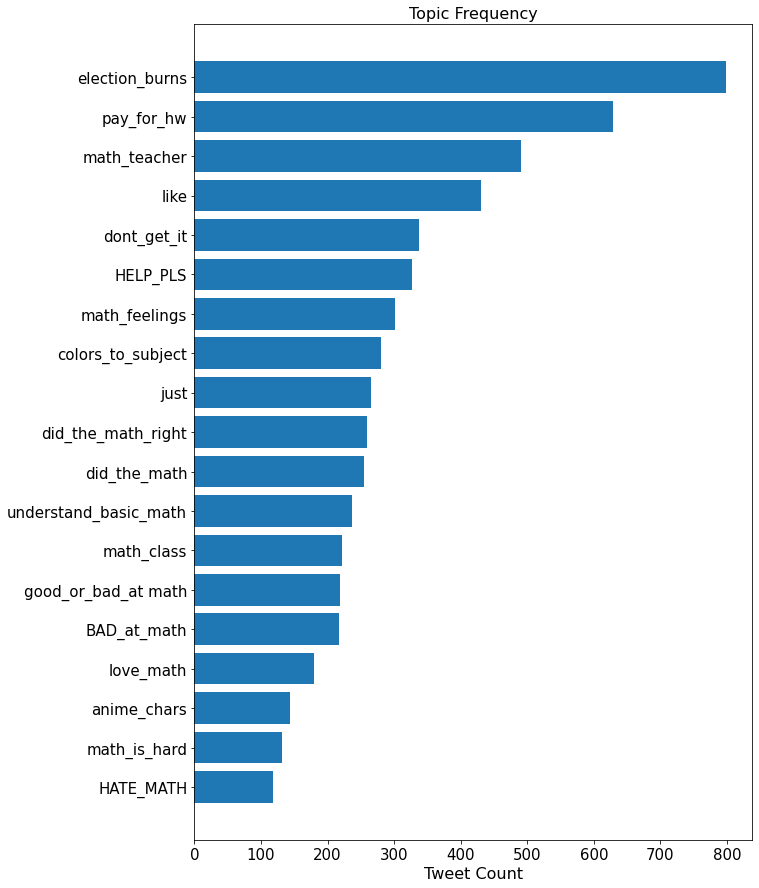

In [333]:
plt.figure(figsize = (10, 15))
plt.xlabel('Tweet Count', fontsize=16)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Topic Frequency", fontsize=16)
plt.barh(keys, values)
plt.savefig('topic_frequency_bar_graph.png', bbox_inches = 'tight');

# Sentiment analysis

In [292]:
def sentiment_score(text):
    analyzer = SentimentIntensityAnalyzer()
    compound_score = analyzer.polarity_scores(text)['compound']
    return compound_score

In [293]:
#separate all the topics
def make_dfs(og_df, topic):
    '''
    function that returns a dataframe of just the specified topic
    ---
    intput: <DataFrame> 
            <string> of the topic you want the new df to be of
    ---
    returns: new df
    '''
    return og_df[og_df['topic'] == topic]

In [294]:
election_burns_df = make_dfs(english_tweet_topics, 'election_burns').copy()
pay_for_hw_df = make_dfs(english_tweet_topics, 'pay_for_hw').copy()
math_teacher_df = make_dfs(english_tweet_topics, 'math_teacher').copy()
like_df = make_dfs(english_tweet_topics, 'like_df').copy()
dont_get_it_df = make_dfs(english_tweet_topics, 'dont_get_it').copy()

HELP_PLS_df = make_dfs(english_tweet_topics, 'HELP_PLS').copy()
math_feelings_df = make_dfs(english_tweet_topics, 'math_feelings').copy()
colors_to_subject_df = make_dfs(english_tweet_topics, 'colors_to_subject').copy()
just_df = make_dfs(english_tweet_topics, 'just').copy()

did_the_math_right_df = make_dfs(english_tweet_topics, 'did_the_math_right').copy()
did_the_math_df = make_dfs(english_tweet_topics, 'did_the_math').copy()
understand_basic_math_df = make_dfs(english_tweet_topics, 'understand_basic_math').copy()
math_class_df = make_dfs(english_tweet_topics, 'math_class').copy()

good_or_bad_at_math_df = make_dfs(english_tweet_topics, 'good_or_bad_at math').copy()
BAD_at_math_df = make_dfs(english_tweet_topics, 'BAD_at_math').copy()
love_math_df = make_dfs(english_tweet_topics, 'love_math').copy()
anime_chars_df = make_dfs(english_tweet_topics, 'anime_chars').copy()

math_is_hard_df = make_dfs(english_tweet_topics, 'math_is_hard').copy()
HATE_MATH_df = make_dfs(english_tweet_topics, 'HATE_MATH').copy()


(['election_burns','pay_for_hw','math_teacher','like','dont_get_it',
  'HELP_PLS','math_feelings','colors_to_subject','just',
  'did_the_math_right','did_the_math','understant_basic_math',
  'math_class',
  'good_or_bad_at math','BAD_at_math','love_math','anime_chars',
  'math_is_hard',
  'HATE_MATH'],

In [295]:
election_burns_df['sentiment_score'] = election_burns_df['clean_tweets'].map(sentiment_score)


In [296]:
election_burns_df.head(15)

,pay_for_hw,math_feelings,dont_get_it,good_or_bad_at math,HATE_MATH,just,math_is_hard,math_class,election_burns,like,anime_chars,did_the_math,colors_to_subject,HELP_PLS,did_the_math_right,BAD_at_math,love_math,understand_basic_math,math_teacher,raw_tweets,translated,clean_tweets,datetime,username,location,tweet_id,topic,sentiment_score
0,0.000000,0.000000,0.000244,0.000000,0.000000,0.000101,0.000000,0.000000,0.001058,0.000000,0.000000,0.000000,0.000384,0.000491,0.000884,0.000000,0.000000,0.000000,0.000000,@math__like 都民,Citizens of Tokyo,citizens of tokyo,2020-11-02 00:36:03,kurage_Ref,深海,1323061272624033792,election_burns,0.0000
22,0.000000,0.000002,0.003361,0.000000,0.000000,0.000435,0.000615,0.000128,0.007832,0.000000,0.000000,0.000000,0.000731,0.000222,0.002422,0.002049,0.000782,0.003388,0.000000,If you believe the economy is essential to you...,if you believe the economy is essential to you...,if you believe the economy is essential to you...,2020-11-02 00:35:38,castironstraw,United States,1323061166831292417,election_burns,-0.5267
31,0.000128,0.000687,0.004627,0.001416,0.000000,0.000103,0.000653,0.000000,0.007699,0.000000,0.000496,0.000000,0.000000,0.000000,0.000195,0.000209,0.003998,0.000000,0.000000,@JAEHEESUPPORTER this also works for anime and...,this also works for anime and manga,this also works for anime and manga,2020-11-02 00:35:28,cure_math,Skaro,1323061125915807746,election_burns,0.0000
33,0.000000,0.000000,0.000673,0.000000,0.000000,0.001832,0.000250,0.000814,0.024040,0.000189,0.000000,0.017558,0.001541,0.000000,0.002494,0.000000,0.000000,0.000000,0.000000,"@athein1 R have cast 3385k, so if a 650k margi...","r have cast 3385k, so if a 650k margin is nece...","r have cast k, so if a k margin is necessary, ...",2020-11-02 00:35:26,Ruochenliu7,"Pittsburgh, PA",1323061116797288449,election_burns,-0.4767
35,0.000000,0.001470,0.000247,0.000000,0.000000,0.001569,0.003249,0.001716,0.010179,0.004099,0.000693,0.000051,0.001306,0.000193,0.000352,0.001455,0.000559,0.003296,0.002489,"RT @mpvaniersel: More #pathfinding: Added ""gre...",rt more #pathfinding: added greedy option. fas...,rt more #pathfinding: added greedy option. fas...,2020-11-02 00:35:25,guerra_santin,"Toluca, México",1323061113077043201,election_burns,-0.5764
61,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.139829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,@Politics1com Easy math: Biden wins by 8%.,easy math: biden wins by 8%.,easy math: biden wins by %.,2020-11-02 00:34:50,Jim_Hannon,"Boston, MA",1323060968390361090,election_burns,0.7650
69,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000365,0.000004,0.000000,0.000000,0.000012,0.000015,0.000000,0.000000,0.000013,0.000000,0.000019,RT @native4data: Almost 60% of those in South ...,rt almost 60% of those in south dakota prisons...,rt almost % of those in south dakota prisons a...,2020-11-02 00:34:36,ydragurl,,1323060909682675712,election_burns,0.0000
72,0.000000,0.000083,0.003809,0.003301,0.000000,0.003382,0.001461,0.000233,0.005209,0.004908,0.001142,0.000431,0.001962,0.000811,0.001903,0.000409,0.000489,0.002855,0.002363,RT @easyjanjansen: Samurai vs Zombie - HTM5 Ga...,rt samurai vs zombie - htm5 game math game: us...,rt samurai vs zombie htm game math game: use...,2020-11-02 00:34:33,EasyWorldNews,Global,1323060896709582849,election_burns,0.0000
104,0.000000,0.000000,0.000897,0.000410,0.000000,0.000784,0.000918,0.000000,0.002854,0.002778,0.000173,0.000000,0.000000,0.000000,0.000189,0.000000,0.000952,0.000000,0.000877,@Whassernaym the game misgenders her constantl...,"the game misgenders her constantly, though","the game misgenders her constantly, though",2020-11-02 00:33:29,cure_math,Skaro,1323060627724783616,election_burns,0.0000
117,0.000876,0.000214,0.005595,0.001755,0.000000,0.000100,0.000651,0.000000,0.007605,0.001293,0.000521,0.000000,0.000000,0.000000,0.000296,0.001150,0.001943,0.000000,0.000000,@

Text(0.5, 1.0, 'Distribution of Sentiment Scores for Election Topic')

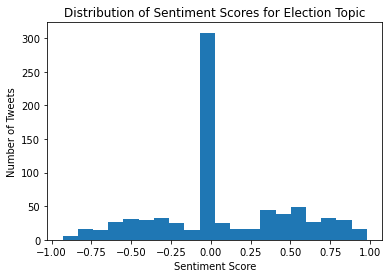

In [297]:
plt.hist(election_burns_df['sentiment_score'], bins = 'auto')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Sentiment Scores for Election Topic')

In [298]:
election_burns_df['sentiment_score'].mean()

0.07533220551378443

In [299]:
def add_sent_score(df):
    df['sentiment_score'] = df['clean_tweets'].map(sentiment_score)

In [300]:
add_sent_score(pay_for_hw_df)
add_sent_score(math_teacher_df)
add_sent_score(like_df)
add_sent_score(dont_get_it_df)

add_sent_score(HELP_PLS_df)
add_sent_score(math_feelings_df)
add_sent_score(colors_to_subject_df)
add_sent_score(just_df)
add_sent_score(did_the_math_right_df)
add_sent_score(did_the_math_df)

In [301]:
pay_for_hw_df.head()

,pay_for_hw,math_feelings,dont_get_it,good_or_bad_at math,HATE_MATH,just,math_is_hard,math_class,election_burns,like,anime_chars,did_the_math,colors_to_subject,HELP_PLS,did_the_math_right,BAD_at_math,love_math,understand_basic_math,math_teacher,raw_tweets,translated,clean_tweets,datetime,username,location,tweet_id,topic,sentiment_score
11,0.013057,0.000099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000042,0.000000,0.000000,0.000000,0.000000,0.000518,0.00000,0.000156,0.000835,RT @ValaAfshar: The benefits of math and geome...,rt the benefits of math and geometry https://t...,rt the benefits of math and geometry https://t...,2020-11-02 00:35:52,Nafeesah_Akin,"Lagos, Nigeria",1323061225534738433,pay_for_hw,0.3818
18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,RT @OutContextCerro: https://t.co/xFsGQA6yy2,rt https://t.co/xfsgqa6yy2,rt https://t.co/xfsgqayy,2020-11-02 00:35:42,math_rojasok,"Central, Paraguay",1323061186389254146,pay_for_hw,0.0000
23,0.008256,0.002849,0.003341,0.000591,0.000000,0.001009,0.000000,0.003197,0.00133,0.000000,0.001549,0.000401,0.004960,0.006257,0.000000,0.000147,0.00000,0.001422,0.000000,I have three assignments one for math and one ...,i have three assignments one for math and one ...,i have three assignments one for math and one ...,2020-11-02 00:35:38,ateezeditland2,....,1323061166621548551,pay_for_hw,0.0000
25,0.011379,0.002178,0.003203,0.000455,0.000823,0.001232,0.000132,0.000592,0.00000,0.002986,0.009483,0.002475,0.000878,0.003063,0.001172,0.000503,0.00029,0.002972,0.002364,elle do your shit list:\n- bio lesson question...,elle do your shit list: - bio lesson questions...,elle do your shit list: bio lesson questions...,2020-11-02 00:35:36,LTWTvol6,s&p’s sbs | ot5 | aimh ♡,1323061158673326080,pay_for_hw,-0.5574
50,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,@math_martinique https://t.co/e03mlzqm7W,https://t.co/e03mlzqm7w,https://t.co/emlzqmw,2020-11-02 00:35:06,MissionEgalite,Martinique,1323061036107399168,pay_for_hw,0.0000


In [302]:
add_sent_score(understand_basic_math_df)
add_sent_score(math_class_df)
add_sent_score(good_or_bad_at_math_df)
add_sent_score(BAD_at_math_df)
add_sent_score(love_math_df)

add_sent_score(anime_chars_df)
add_sent_score(math_is_hard_df)
add_sent_score(HATE_MATH_df)

In [303]:
HATE_MATH_df.head(15)

,pay_for_hw,math_feelings,dont_get_it,good_or_bad_at math,HATE_MATH,just,math_is_hard,math_class,election_burns,like,anime_chars,did_the_math,colors_to_subject,HELP_PLS,did_the_math_right,BAD_at_math,love_math,understand_basic_math,math_teacher,raw_tweets,translated,clean_tweets,datetime,username,location,tweet_id,topic,sentiment_score
83,0.000000,0.053108,0.003485,0.000329,0.083734,0.000000,0.000000,0.010204,0.000183,0.000353,0.000928,0.014939,0.000630,0.005321,0.001046,0.000926,0.000158,0.000000,0.031334,My school is telling me that they would rather...,my school is telling me that they would rather...,my school is telling me that they would rather...,2020-11-02 00:34:05,ducksanddeath,They/them,1323060777612431365,HATE_MATH,-0.9493
110,0.000000,0.088018,0.000000,0.000000,0.131626,0.000000,0.000000,0.000000,0.000000,0.000000,0.000790,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015894,0.000000,@annale_12_ i hate math... and i’m stupid...,i hate math... and im stupid.... ill pass /lh,i hate math... and im stupid.... ill pass /lh,2020-11-02 00:33:22,KATSUKlBF,he / they || 15,1323060598943453190,HATE_MATH,-0.8720
332,0.000000,0.002849,0.001810,0.000000,0.147261,0.000000,0.001009,0.011641,0.000000,0.001800,0.000433,0.002459,0.001450,0.020830,0.000494,0.001001,0.000000,0.004602,0.021550,@BRAVEVINYL 1. PUT A TW BC I HATE MATH/SCHOOL/...,1. put a tw bc i hate math/school/hw and 2. no,. put a tw bc i hate math/school/hw and . no,2020-11-02 01:12:08,SCRIPTEDNORTH,multi stan acc • minor ♡,1323070355787948033,HATE_MATH,-0.7096
411,0.005086,0.000000,0.000000,0.003133,0.156928,0.049265,0.000226,0.000000,0.000000,0.000043,0.000000,0.000000,0.051874,0.000000,0.000000,0.000000,0.000000,0.000000,0.001112,wish i had a boyfriend who was an english majo...,wish i had a boyfriend who was an english majo...,wish i had a boyfriend who was an english majo...,2020-11-02 01:09:57,ErrricaD,Toronto,1323069806602555392,HATE_MATH,-0.6908
495,0.000000,0.002359,0.000000,0.002818,0.114120,0.003319,0.000619,0.000000,0.000000,0.012777,0.004211,0.000811,0.000000,0.000000,0.006219,0.000000,0.003008,0.051576,0.000000,@moamtal IDK I USUALLY HATE MATH BUT LONG DIVI...,idk i usually hate math but long division is a...,idk i usually hate math but long division is a...,2020-11-02 01:07:35,AviatorLight,,1323069209123999745,HATE_MATH,0.3528
507,0.000000,0.006805,0.002955,0.002607,0.013153,0.000000,0.000070,0.003157,0.003234,0.011098,0.001849,0.004045,0.000000,0.011849,0.004825,0.001995,0.000357,0.001111,0.000124,I LEGITIMATELY stressed my self out thinking o...,i legitimately stressed my self out thinking o...,i legitimately stressed my self out thinking o...,2020-11-02 01:07:23,bangtanscabrona,black lives matter,1323069159329079297,HATE_MATH,-0.3400
654,0.000000,0.000000,0.000000,0.000000,0.143634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,@NekoDealer69 @MetricMudkip No \nI hate math \...,no i hate math fucket https://t.co/s8zgcmy0ql,no i hate math fucket https://t.co/szgcmyql,2020-11-02 01:36:25,Kpause4,,1323076466477879296,HATE_MATH,0.2018
699,0.000000,0.000000,0.000000,0.000000,0.100317,0.000000,0.000000,0.095549,0.000000,0.000000,0.058109,0.000000,0.000000,0.005093,0.001327,0.000000,0.000000,0.000000,0.000000,//math\n\nPls istg i hate zoom it always lags ...,//math pls istg i hate zoom it always lags whe...,//math pls istg i hate zoom it always lags whe...,2020-11-02 01:35:23,kronospstl_,,1323076204434399233,HATE_MATH,-0.7096
777,0.001919,0.000179,0.000852,0.001989,0.120221,0.000000,0.000000,0.000000,0.005759,0.001264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"i fucking hate these, here is the course guide...","i fucking hate these, here is the course guide...","i fucking hate these, here is the course guide...",2020-11-02 02:11:14,Jistiir_DE,Shaw's Bar,1323085228311683073,HATE_MATH,-0.8268
884,0.000000,0.042120,0.047532,0.000000,0.07

In [304]:
add_sent_score(english_tweet_topics)

<ipython-input-299-169209b0c5da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_score'] = df['clean_tweets'].map(sentiment_score)


In [305]:
english_tweet_topics.head()

,pay_for_hw,math_feelings,dont_get_it,good_or_bad_at math,HATE_MATH,just,math_is_hard,math_class,election_burns,like,anime_chars,did_the_math,colors_to_subject,HELP_PLS,did_the_math_right,BAD_at_math,love_math,understand_basic_math,math_teacher,raw_tweets,translated,clean_tweets,datetime,username,location,tweet_id,topic,sentiment_score
0,0.000000,0.000000,0.000244,0.000000,0.000000,0.000101,0.000000,0.000000,0.001058,0.000000,0.000000,0.000000,0.000384,0.000491,0.000884,0.000000,0.000000,0.0,0.000000,@math__like 都民,Citizens of Tokyo,citizens of tokyo,2020-11-02 00:36:03,kurage_Ref,深海,1323061272624033792,election_burns,0.0000
1,0.000000,0.000000,0.000015,0.002589,0.001671,0.000000,0.000000,0.000000,0.000000,0.000347,0.000171,0.000000,0.000133,0.000000,0.000816,0.000000,0.000000,0.0,0.004735,@HamillHimself The Force of math is not with you.,the force of math is not with you.,the force of math is not with you.,2020-11-02 00:36:02,Live2teachLives,"Levelland, Texas, USA",1323061269927251968,math_teacher,0.0000
2,0.000242,0.000000,0.002704,0.000551,0.000000,0.001041,0.003024,0.000000,0.004189,0.004264,0.000223,0.000000,0.000000,0.000386,0.000216,0.001385,0.000228,0.0,0.001213,@JorgeHe18983518 @Roblox what math? what game ...,what math what game account,what math what game account,2020-11-02 00:36:02,NotSuperIsTaken,Trying to get free bobux,1323061269000310784,like,0.0000
3,0.000000,0.000421,0.004027,0.000000,0.000280,0.001327,0.000023,0.002437,0.000000,0.000000,0.000895,0.002292,0.002725,0.003509,0.000000,0.000491,0.000000,0.0,0.021429,never forget me in high school being a vegetar...,never forget me in high school being a vegetar...,never forget me in high school being a vegetar...,2020-11-02 00:36:02,chayaelizabeth,bucky barnes’s AND zuko’s ass,1323061268861825025,math_teacher,0.1695
4,0.000000,0.000000,0.000000,0.000797,0.000000,0.106216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.209163,0.0,0.022598,Just got 55 on my math test love it here 😍😍😍 /neg,just got 55 on my math test love it here /neg,just got on my math test love it here /neg,2020-11-02 00:36:02,Nashrambl_,she/they | ace |,1323061267687333888,love_math,0.6369


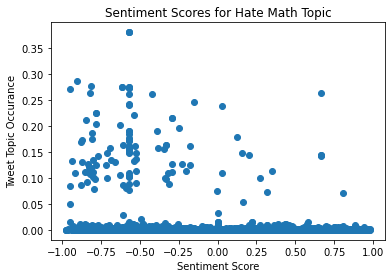

In [309]:
x = english_tweet_topics['sentiment_score']
y = english_tweet_topics['HATE_MATH']
plt.scatter(x,y )
plt.title('Sentiment Scores for Hate Math Topic')
plt.xlabel('Sentiment Score')
plt.ylabel('Tweet Topic Occurance')
plt.savefig('sentiment_scatter_hate_math.png');

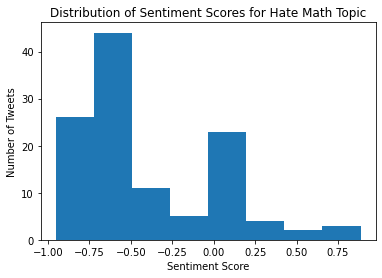

In [310]:
plt.hist(HATE_MATH_df['sentiment_score'], bins = 'auto')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Sentiment Scores for Hate Math Topic')
plt.savefig('hate_math_dist_sentiment.png');

In [311]:
HATE_MATH_df['sentiment_score'].mean()

-0.4050847457627117

In [312]:
distribution = [english_tweet_topics[column].mean() for column in english_tweet_topics.iloc[:,:19].columns]


In [313]:
len(distribution)

19

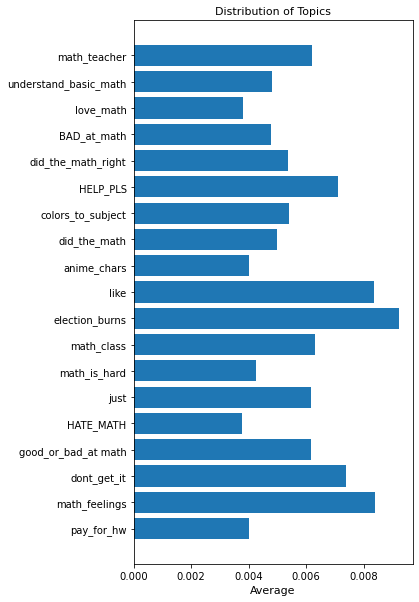

In [331]:
plt.figure(figsize = (5, 10))
plt.xlabel('Average', fontsize=11)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Distribution of Topics', fontsize=11)
plt.barh(english_tweet_topics.iloc[:,:19].columns, distribution)
plt.savefig('distribution_of_topics.png',  bbox_inches = 'tight');

## Check out the mean sentiment scores

In [315]:
math_teacher_df['sentiment_score'].mean()

0.05007530612244901

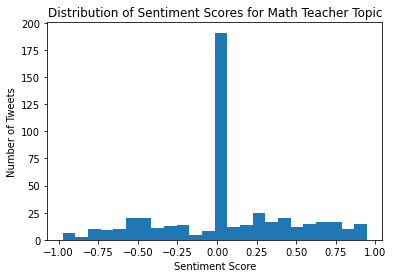

In [316]:
plt.hist(math_teacher_df['sentiment_score'], bins = 'auto')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Sentiment Scores for Math Teacher Topic');

In [317]:
anime_chars_df['sentiment_score'].mean()

0.03320902777777776

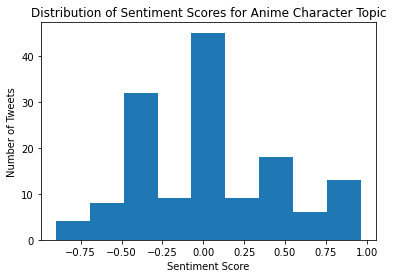

In [318]:
plt.hist(anime_chars_df['sentiment_score'], bins = 'auto')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Sentiment Scores for Anime Character Topic')
plt.savefig('anime_sentiment_score_dist.png');

In [319]:
for tweet in anime_chars_df['translated']:
    print(tweet)
    print()

rt kurapika is not a 2d character. its an emotion. hes the reason i wake up in the morning. hes what i think about in every

gave us a math problem that wasn't even a carry the one and i still had to think about it.

start your morning with a math test:

gaara is not a 2d character. its an emotion. hes the reason i wake up in the morning. hes what i think about in every boring math lesson. hes a reason to breathe. https://t.co/jw9bsus59a

rt gon is not a 2d character. its an emotion. he is the reason i wake up in the morning. he is what i think about in every borin

why does math have to be the first thing in the morning gt:0

I think we will make it. no math no gain hahahahahahahaha

When counting the number of cases abstractly from a concrete example with the number of cases of high school mathematics a, it seems better to think that the number of abstract cases is defined by that, for example, the number of duplicate combinations is generally defined by nhrnr1cr. That's the only way

In [320]:
sentiment_score('kim aiden is not a 2d character. its an emotion. hes the reason i wake up in the morning. hes what i think about in every boring math lesson. hes a reason to breathe.')


-0.3182

In [321]:
anime_chars_df.head()

,pay_for_hw,math_feelings,dont_get_it,good_or_bad_at math,HATE_MATH,just,math_is_hard,math_class,election_burns,like,anime_chars,did_the_math,colors_to_subject,HELP_PLS,did_the_math_right,BAD_at_math,love_math,understand_basic_math,math_teacher,raw_tweets,translated,clean_tweets,datetime,username,location,tweet_id,topic,sentiment_score
21,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.371695,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,RT @kurtababy: kurapika is NOT a 2D character....,rt kurapika is not a 2d character. its an emot...,rt kurapika is not a d character. its an emoti...,2020-11-02 00:35:40,lourdofmylife,grace infj uni sophomore! :),1323061177191034880,anime_chars,0.0000
40,0.0,0.000000,0.005211,0.000654,0.0,0.011403,0.0,0.000000,0.002695,0.00976,0.055929,0.000636,0.0,0.002330,0.000878,0.0,0.004940,0.005205,0.000851,@ArianaGrande gave us a math problem that wasn...,gave us a math problem that wasn't even a carr...,gave us a math problem that wasnt even a carry...,2020-11-02 00:35:17,chrismayaux,"Homewood, IL",1323061080978001920,anime_chars,-0.4019
90,0.0,0.004723,0.002271,0.012204,0.0,0.011510,0.0,0.001753,0.000000,0.00000,0.079835,0.003095,0.0,0.007037,0.000000,0.0,0.023925,0.001696,0.014982,awali pagimu dgn ulangan math:),start your morning with a math test:,start your morning with a math test:,2020-11-02 00:33:54,namooniiekim,BigHit Stan♡,1323060732372549632,anime_chars,0.0000
141,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.388402,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,Gaara is NOT a 2D character. It's an emotion. ...,gaara is not a 2d character. its an emotion. h...,gaara is not a d character. its an emotion. he...,2020-11-02 00:32:39,bluebocchan,"London, England",1323060416247930880,anime_chars,-0.3182
147,0.0,0.000000,0.000000,0.000365,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.260171,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,RT @killujk: gon is NOT a 2D character. it's a...,rt gon is not a 2d character. its an emotion. ...,rt gon is not a d character. its an emotion. h...,2020-11-02 00:32:32,killugoning,They/Them/Pur/Purrs,1323060388292927489,anime_chars,0.0000


In [322]:
HELP_PLS_df['sentiment_score'].mean()

0.1368103975535167

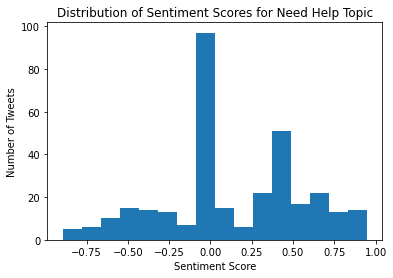

In [323]:
plt.hist(HELP_PLS_df['sentiment_score'], bins = 'auto')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Sentiment Scores for Need Help Topic');

In [324]:
understand_basic_math_df['sentiment_score'].mean()

0.019915189873417737

In [328]:
did_the_math_df['sentiment_score'].mean()

-0.014813725490196095

In [329]:
for tweet in did_the_math_right_df['translated']:
    print(tweet)
    print()

insomnia sharpens your math skills because you spend all night calculating how much sleep you'll get if youre able to fall asleep right now.

samurai vs zombie - htm5 game math game: use your reasoning and speed in this mathematics game, hit the answer before being attacked by the zombie, every right answer from one point to you, have fun. https://t.co/slzsbpijuj #games #onlinegames #guestposts https://t.co/3dhptwdmee

rt nigga look like the dna math was almost right but somebody forgot the carry the 1 https://t.co/vd0nd2usej

and if my math is correct, harvick is in 3rd in driver points you want to know why hes not in the final 4 because of the win and in. not because he screwed by the system. but because 2 drivers with multiple wins each won races the system got it right

the math is matching

also if my math is right, actually has 77% in this poll if we subtract the people who marked cant vote. which is very encouraging

rt the math ain't matching

the math ain't matching https://t.